<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


'wget' is not recognized as an internal or external command,
operable program or batch file.


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



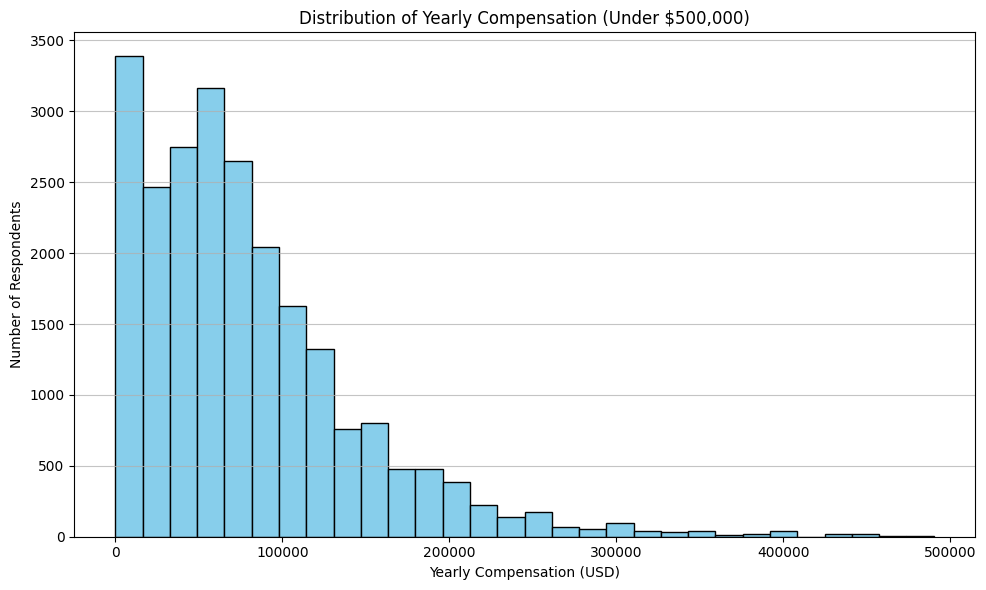

In [8]:
## Write your code here
# Visualize the distribution of yearly compensation (ConvertedCompYearly) using a histogram, excluding extreme outliers

filtered = df[df['ConvertedCompYearly'] < 500000]['ConvertedCompYearly'].dropna()

plt.figure(figsize=(10,6))
plt.hist(filtered, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation (Under $500,000)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [9]:
print(df['Age'].unique())

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


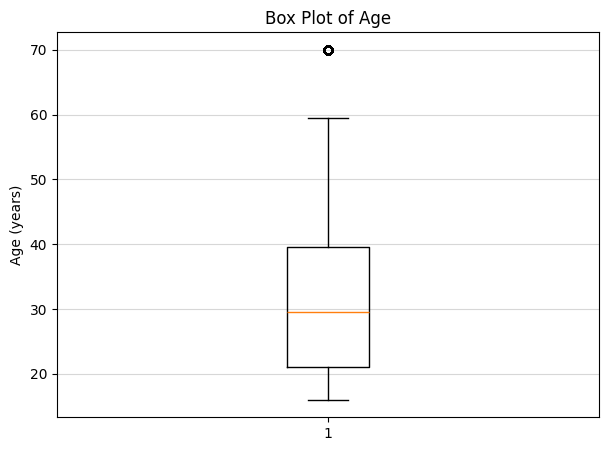

In [10]:
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

df['Age_numeric'] = df['Age'].map(age_map)

plt.figure(figsize=(7,5))
plt.boxplot(df['Age_numeric'].dropna())
plt.title('Box Plot of Age')
plt.ylabel('Age (years)')
plt.grid(axis='y', alpha=0.5)
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



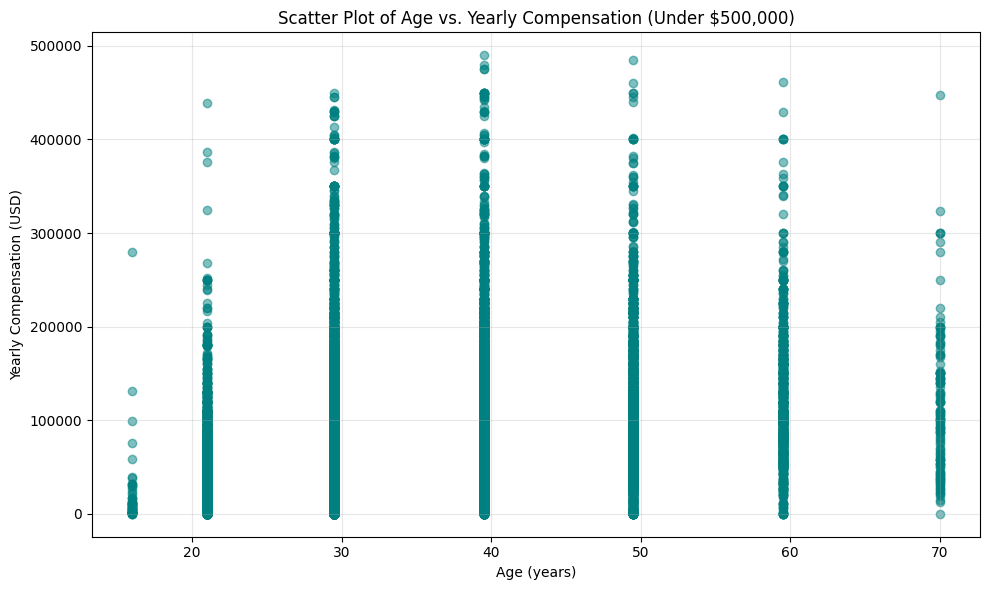

In [13]:
# Filter out extreme compensation outliers for a clearer scatter plot
filtered_df = df[(df['ConvertedCompYearly'] < 500000) & (df['Age_numeric'].notna())]

plt.figure(figsize=(10,6))
plt.scatter(filtered_df['Age_numeric'], filtered_df['ConvertedCompYearly'], alpha=0.5, color='teal')
plt.title('Scatter Plot of Age vs. Yearly Compensation (Under $500,000)')
plt.xlabel('Age (years)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.



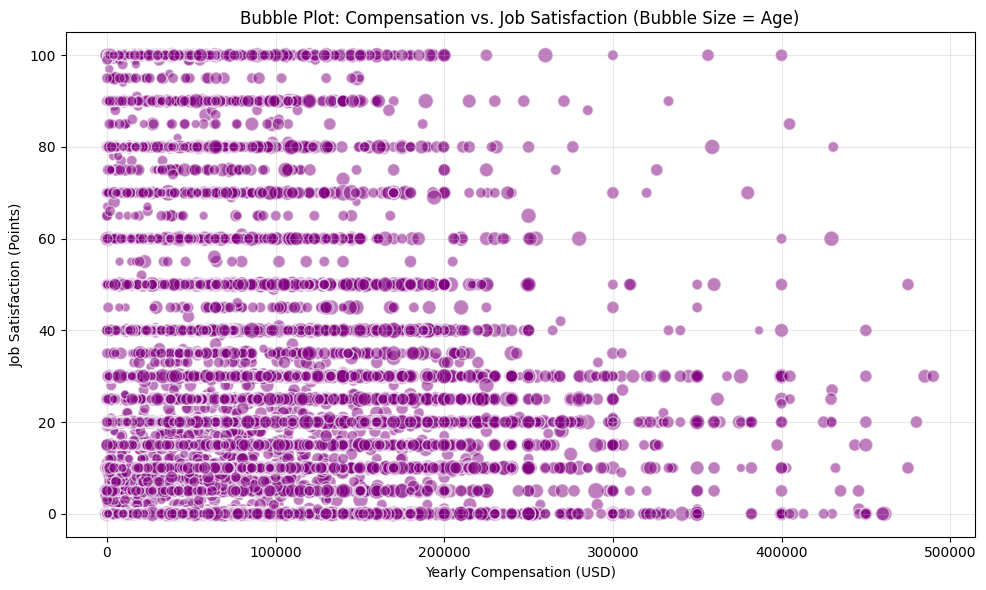

In [14]:
## Write your code here
# Step 1: Filter out extreme compensation outliers and drop missing values
bubble_df = df[
    (df['ConvertedCompYearly'] < 500000) &
    (df['JobSatPoints_6'].notna()) &
    (df['Age_numeric'].notna())
][['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric']]

# Step 2: Create a bubble plot
plt.figure(figsize=(10,6))
plt.scatter(
    bubble_df['ConvertedCompYearly'],
    bubble_df['JobSatPoints_6'],
    s=bubble_df['Age_numeric']*2,  # Bubble size proportional to age
    alpha=0.5,
    color='purple',
    edgecolors='w'
)
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



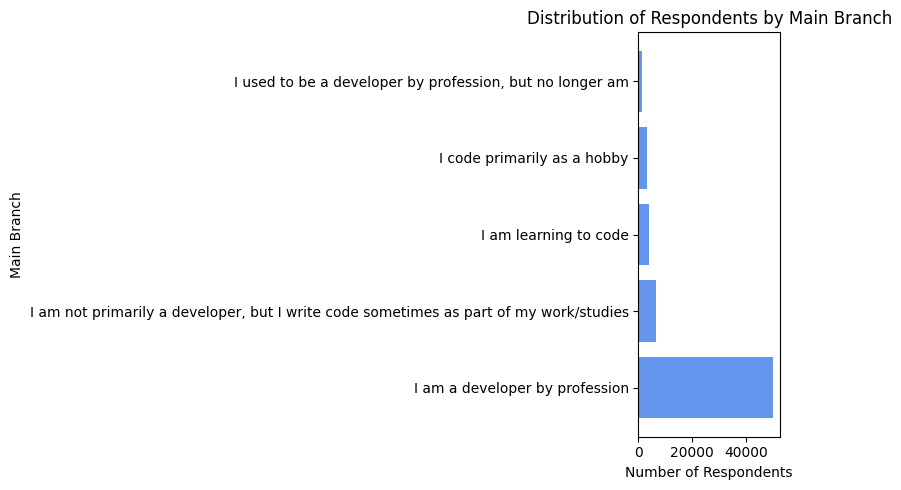

In [15]:
## Write your code here
# Step 1: Count the number of respondents for each MainBranch category
mainbranch_counts = df['MainBranch'].value_counts()

# Step 2: Create a horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(mainbranch_counts.index, mainbranch_counts.values, color='cornflowerblue')
plt.title('Distribution of Respondents by Main Branch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



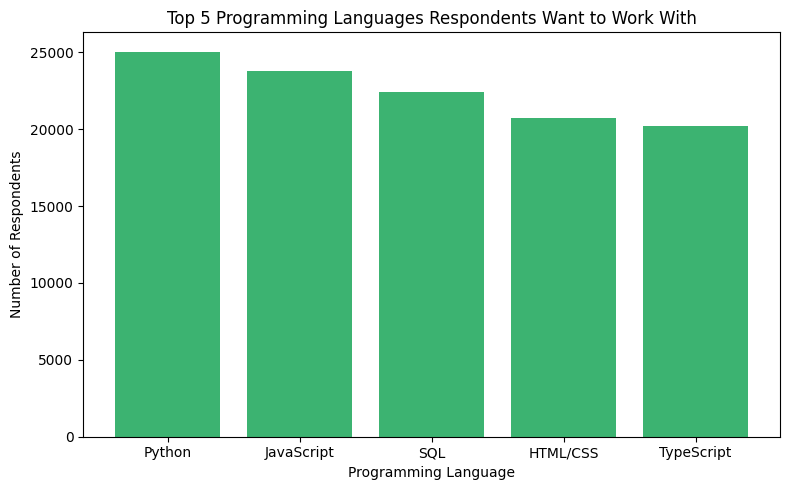

In [16]:
## Write your code here
# Step 1: Split and count all programming languages respondents want to work with
from collections import Counter

# Drop missing values and split each entry by ';'
languages = df['LanguageWantToWorkWith'].dropna().str.split(';')
# Flatten the list and count occurrences
language_counts = Counter([lang.strip() for sublist in languages for lang in sublist])

# Step 2: Get the top 5 most desired languages
top_languages = language_counts.most_common(5)
langs, counts = zip(*top_languages)

# Step 3: Create a vertical bar chart
plt.figure(figsize=(8,5))
plt.bar(langs, counts, color='mediumseagreen')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.tight_layout()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


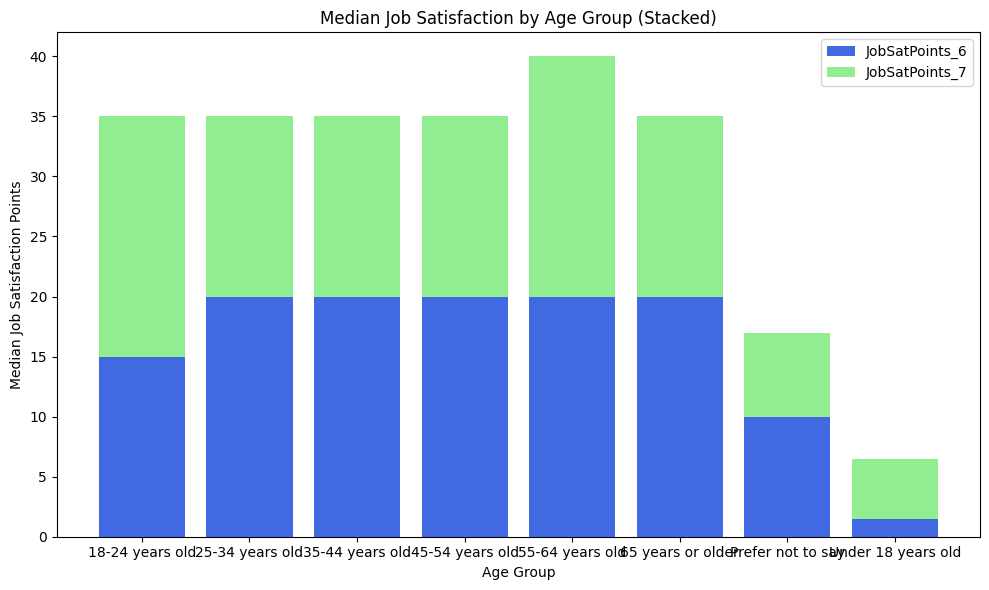

In [17]:
## Write your code here
# Step 1: Group data by Age and calculate median job satisfaction scores for each age group
median_job_sat = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 2: Prepare data for the stacked bar chart
age_groups = median_job_sat.index.tolist()
job_sat_6 = median_job_sat['JobSatPoints_6'].tolist()
job_sat_7 = median_job_sat['JobSatPoints_7'].tolist()

# Step 3: Create a stacked bar chart
plt.figure(figsize=(10,6))
plt.bar(age_groups, job_sat_6, label='JobSatPoints_6', color='royalblue')
plt.bar(age_groups, job_sat_7, bottom=job_sat_6, label='JobSatPoints_7', color='lightgreen')
plt.title('Median Job Satisfaction by Age Group (Stacked)')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.legend()
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PostgreSQL'),
  Text(1, 0, 'MySQL'),
  Text(2, 0, 'SQLite'),
  Text(3, 0, 'Microsoft SQL Server'),
  Text(4, 0, 'MongoDB'),
  Text(5, 0, 'Redis'),
  Text(6, 0, 'MariaDB'),
  Text(7, 0, 'Elasticsearch'),
  Text(8, 0, 'Oracle'),
  Text(9, 0, 'Dynamodb')])

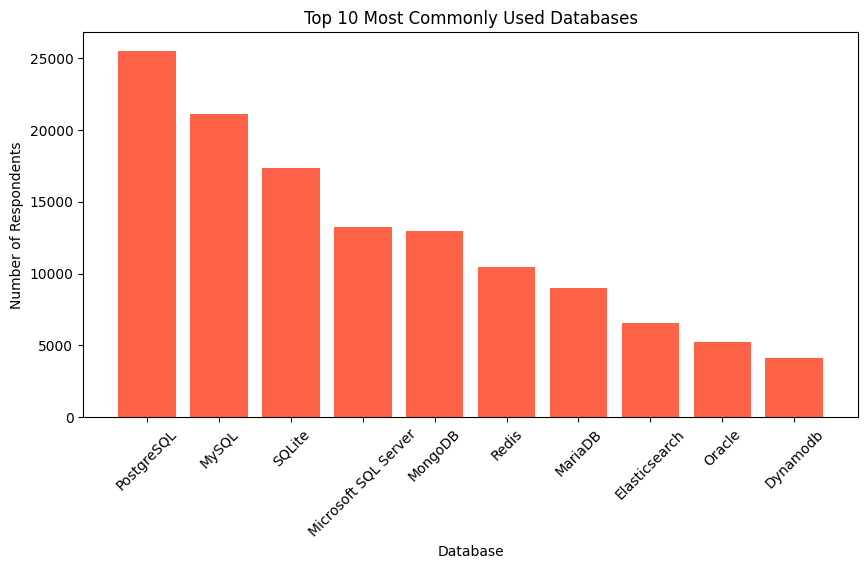

In [18]:
## Write your code here
# Step 1: Split and count all databases respondents have worked with
from collections import Counter

# Drop missing values and split each entry by ';'
databases = df['DatabaseHaveWorkedWith'].dropna().str.split(';')
# Flatten the list and count occurrences
db_counts = Counter([db.strip() for sublist in databases for db in sublist])

# Step 2: Get the top 10 most popular databases
top_dbs = db_counts.most_common(10)
db_names, db_values = zip(*top_dbs)

# Step 3: Create a vertical bar chart
plt.figure(figsize=(10,5))
plt.bar(db_names, db_values, color='tomato')
plt.title('Top 10 Most Commonly Used Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



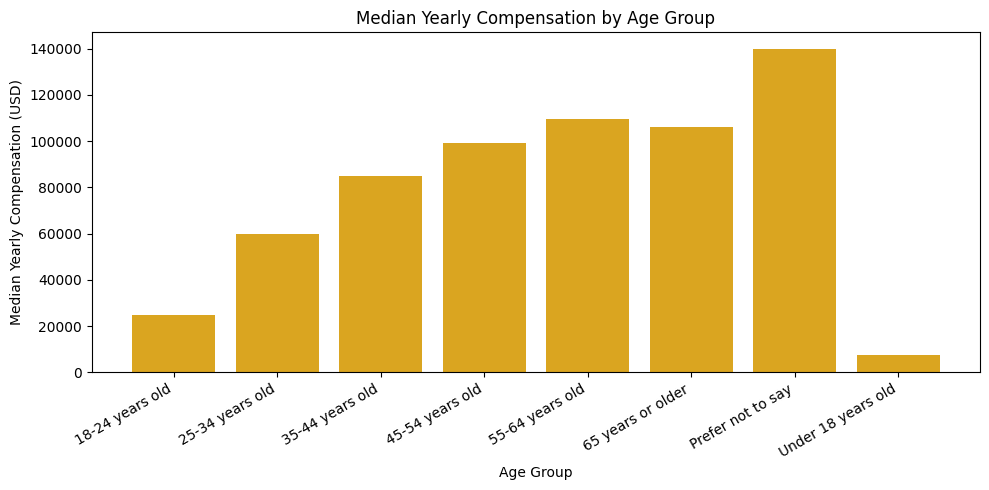

In [20]:
# Step 1: Group data by Age and calculate median yearly compensation for each age group
median_comp = df.groupby('Age')['ConvertedCompYearly'].median()

# Step 2: Prepare data for the grouped bar chart
age_groups = median_comp.index.tolist()
comp_values = median_comp.values.tolist()

# Step 3: Create a grouped bar chart with improved x-axis label spacing
plt.figure(figsize=(10,5))
bars = plt.bar(age_groups, comp_values, color='goldenrod')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (USD)')
plt.xticks(rotation=30, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States of America'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'India'),
  Text(3, 0, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(4, 0, 'Ukraine'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Poland'),
  Text(8, 0, 'Netherlands'),
  Text(9, 0, 'Brazil')])

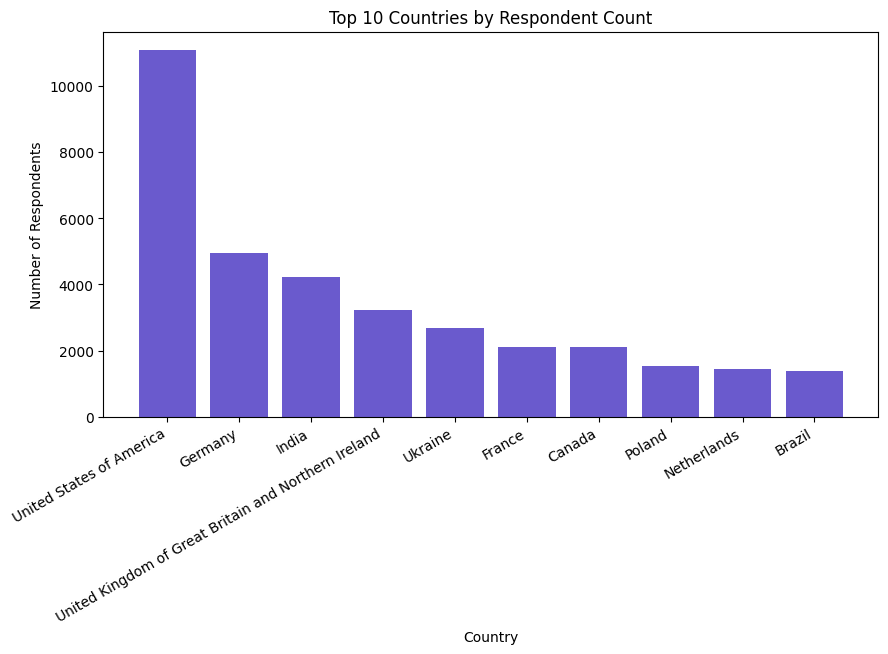

In [21]:
## Write your code here
# Step 1: Count the number of respondents for each country
country_counts = df['Country'].value_counts()

# Step 2: Select the top 10 countries for better visualization
top_countries = country_counts.head(10)

# Step 3: Create a vertical bar chart to show respondent distribution by country
plt.figure(figsize=(10,5))
plt.bar(top_countries.index, top_countries.values, color='slateblue')
plt.title('Top 10 Countries by Respondent Count')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30, ha='right')  # Rotate and right-align x-axis labels for


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
